In [1]:
from MCTS import Card, ConstModel, InfoSet, Action

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('training_data/df-stats.csv')

In [3]:
df["h'"] = 1/(1 + df['p'])

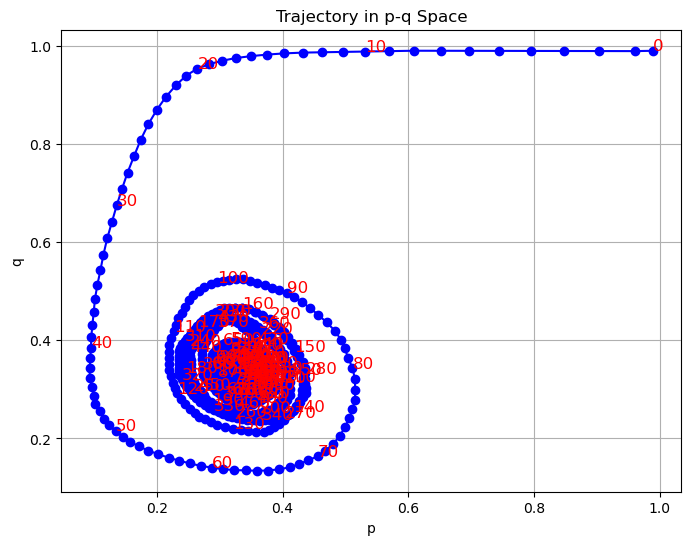

In [4]:
data = df  


plt.figure(figsize=(8, 6)) 
plt.plot(data['p'], data['q'], marker='o', linestyle='-', color='b')
plt.title('Trajectory in p-q Space') 
plt.xlabel('p')  
plt.ylabel('q') 
plt.grid(True) 

# Annotate every 10th point with its order number
for i, (p, q) in enumerate(zip(data['p'], data['q'])):
    if i % 10 == 0: 
        plt.text(p, q, str(i), color="red", fontsize=12)
        
plt.scatter([1/3], [1/3], color='green', s=100, marker='x', label='Target (1/3, 1/3)')

plt.show()

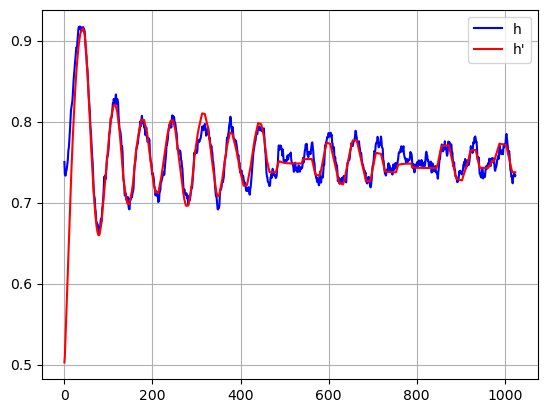

In [5]:
plt.plot(data.index, data['h'], color='blue', label='h')
plt.plot(data.index, data["h'"], color='red', label="h'")
plt.legend()
plt.grid(True)